In [31]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import scipy
from IPython.display import display, Latex

In [2]:
k1, k2, k3 = 1, 4, 1
p1, p2, p3 = 2, 1.2, 1
q1, q2, q3 = 1, 2, 1.5
m1, m2, m3 = 2, 3, 3

alpha1, alpha2 = 1.5, 1.1
a, b = 0, 4
n = 41 # 81, 201

In [3]:
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function)(x)
u = m1 * sp.cos(m2 * x) + m3
k = k1 * sp.cos(k2 * x) + k3
q = q1 * sp.sin(q2 * x) + q3

In [4]:
eq0 = -sp.diff(k*sp.diff(f, x), x) + q * f
eq1 = (-k * sp.diff(u, x) + alpha1 * u)
eq2 = (k * sp.diff(u, x) + alpha2 * u)

In [5]:
f1 = eq0.subs({f:u}).simplify()
f1

(sin(2*x) + 1.5)*(2*cos(3*x) + 3) + 18*(cos(4*x) + 1)*cos(3*x) - 24*sin(3*x)*sin(4*x)

In [6]:
C1 = eq1.subs({f:u}).simplify()
C1

6*(cos(4*x) + 1)*sin(3*x) + 3.0*cos(3*x) + 4.5

In [7]:
C2 = eq2.subs({f:u}).simplify()
C2

-6*(cos(4*x) + 1)*sin(3*x) + 2.2*cos(3*x) + 3.3

In [8]:
mu1 = sp.simplify(eq1.subs({u:u}).subs({x:a}))
mu1

7.50000000000000

In [9]:
mu2 = sp.simplify(eq2.subs({u:u}).subs({x:b})).evalf()
mu2

5.29279136636670

In [10]:
X = np.linspace(start=a, stop=b, num=n + 1)
h = (b - a) * 1.0 / n

In [11]:
sp.Integral(f1, (x, a, b)).doit().evalf()

17.5101044423310

In [12]:
A = np.array([h / sp.integrate( 1 / k, (x, X[i], X[i+1])).evalf() for i in range(n)])

In [13]:
d0 =2 / h * sp.integrate(q, (x, a, a + h / 2)).evalf()
D = np.array(
    [1 / h * sp.integrate(q, (x, X[i] + h / 2, X[i+1] - h / 2)).evalf() for i in range(n)] + [2 / h * sp.integrate(q, (x, b - h / 2, b)).evalf()])
len(D)

42

In [14]:
phi_0 = 2 / h * sp.integrate(f1, (x, a, a + h / 2)).evalf()
Phi = np.array(
    [1 / h * sp.integrate(f1, (x, X[i] + h / 2, X[i+1] - h / 2)).evalf() for i in range(n)] + [2 / h * sp.integrate(f1, (x, b - h / 2, b)).evalf()])

In [15]:
alpha_ = alpha1 + h / 2 * d0
mu_ = mu1 + h / 2 * phi_0

In [16]:
AA = np.zeros((n + 1, n + 1))
BB = np.zeros(n + 1)

In [17]:
AA[0][0] = A[0] / h + alpha_
AA[0][1] = -A[0] / h
BB[0] = mu_

In [18]:
for i in range(1, n):
    AA[i][i - 1] = A[i] / h + D[i - 1]
    AA[i][i] = -A[i] / h
BB[i] = Phi[i - 1]

In [28]:
alpha2_ = alpha2 + h / 2 * D[n]
mu2_ = mu2 + h / 2 * Phi[n]

AA[n][n - 1] = -A[n-1] / h + D[n] + alpha2_
AA[n][n] = A[n-1] / h
BB[n] = mu2_

In [32]:
Yi = scipy.linalg.solve(np.array(AA), np.array(BB))

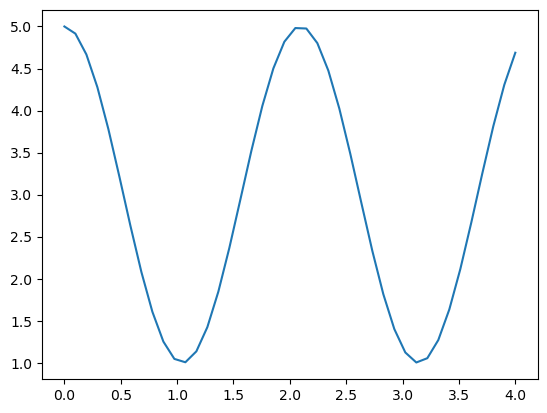

In [36]:
plt.plot(X, [u.subs({x:xi}) for xi in X], label='u(x)')